## 서울시에서 공개한 코로나19 발생동향 분석
* http://www.seoul.go.kr/coronaV/coronaStatus.do

## 분석에 사용할 Pandas 주요기능
* Pandas cheat sheet 를 함께 보세요! : [Pandas_Cheat_Sheet.pdf](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)

* 파일 불러오기
    * to_csv("파일명", index=False) : csv 파일로 저장하기
    * read_csv("파일명") : csv 파일 불러오기
    
* Pandas를 통한 파일 저장과 불러오기
    * shape를 통한 행과 열의 수 보기
    * head, tail, sample 을 통한 일부 데이터 가져오기
    
* DataFrame의 info(), describe() 등을 통한 요약과 기술통계 값 구하기
    * info()
    * describe()
    * nunique()
    * index
    * columns
    * values
    
* Pandas의  DataFrame과 Series의 이해
    * Series : 1차원 벡터구조
    * DataFrame : 2차원 행렬구조
    
* 색인하기
    * [컬럼]
    * .loc[행]
    * .loc[행, 열]
    * .loc[조건식, 열]
    
* DataFrame의 데이터 타입 이해하기
    * 날짜 데이터의 변환
    
* DataFrame 다루기
    * 열(column) 인덱싱
    * 행(index) 인덱싱
    * 행, 열 인덱싱
    * 정렬하기 : sort_values 사용하기
    * 조건식 사용하기

* 빈도수 구하기
    * 한 개의 변수 : series.value_counts()
    * 두 개의 변수 : pd.crosstab()

* groupby 와 pivot_table
    * 다양한 연산식의 사용


## 라이브러리 로드

In [5]:
# pandas, numpy, matplotlib.pyplot 불러오기

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 시각화 기본 명칭 확인하기
* [Anatomy of a figure — Matplotlib documentation](https://matplotlib.org/stable/gallery/showcase/anatomy.html)

## 시각화 한글폰트 설정하기

In [13]:
# 윈도우 : "Malgun Gothic"
# 맥 : "AppleGothic"
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()
    # colab 사용자는 system_name이 'Linux'로 확인

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont
        
        font_family = "NanumBarunGothic"
    return font_family


plt.style.use("seaborn-whitegrid")
#plt.style.use("ggplot") -> 그래프 스타일 빨간색

# 폰트설정
plt.rc("font", family=get_font_family())
# 마이너스폰트 설정
plt.rc("axes", unicode_minus=False)

# 그래프에 retina display 적용
from IPython.display import set_matplotlib_formats

set_matplotlib_formats("retina")

C:\Users\mayo9\AppData\Local\Temp/ipykernel_9452/306103839.py:39: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats("retina")


In [11]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


<AxesSubplot:title={'center':'한글'}>

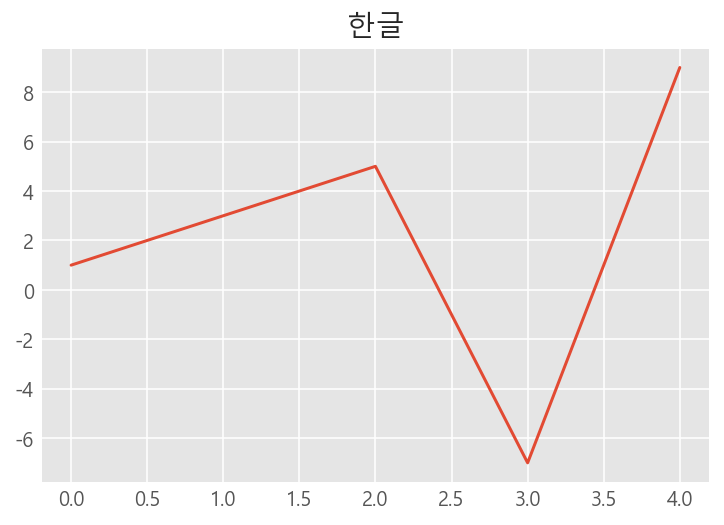

In [14]:
# 그래프 그려보기
pd.Series([1, 3, 5, -7, 9]).plot(title="한글")

## 파일 불러오기
<img src="https://pandas.pydata.org/docs/_images/02_io_readwrite.svg">

In [15]:
# seoul-covid19-2021-12-18.csv 불러오기
# df_01 변수에 담아 재사용합니다.
# df_01
df_01 = pd.read_csv("data/seoul-covid19-2021-12-18.csv")
df_01.shape  # 결과 값 : 하루에 20만명까지 확진자가 나왔다.

(200000, 7)

## head, tail, sample 로 일부 데이터만 보기

In [17]:
df_01.head()  
#강사님 조언 : 아래 도메인을 보면, 컬럼 별로 무엇을 의미하는지 파악이 어렵다 -> 담당자에게 빠르게 물어보는게 현명하다!, 필요한 질문은 꼭 하라!

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,200000,561465,2021-12-18,중구,-,기타 확진자 접촉,NaN
1,199999,562278,2021-12-18,구로구,-,구로구 소재 요양시설 관련('21.11.),NaN
2,199998,562213,2021-12-18,금천구,-,기타 확진자 접촉,NaN
3,199997,562362,2021-12-18,중구,-,감염경로 조사중,NaN
4,199996,560491,2021-12-18,중구,-,기타 확진자 접촉,NaN


In [16]:
# seoul-covid19-2021-12-26.csv 불러오기
# df_02 변수에 담아 재사용합니다.
# df_02
df_02 = pd.read_csv("data/seoul-covid19-2021-12-26.csv")
df_02.shape

(18646, 7)

In [18]:
# 일부데이터만 가져와보기
df_02.head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,218646,611159,2021-12-26,노원구,-,감염경로 조사중,NaN
1,218645,610703,2021-12-26,노원구,-,감염경로 조사중,NaN
2,218644,611537,2021-12-26,송파구,-,감염경로 조사중,NaN
3,218643,607530,2021-12-26,송파구,-,감염경로 조사중,NaN
4,218642,607522,2021-12-26,송파구,-,감염경로 조사중,NaN


## concat 으로 여러 개의 데이터프레임 합치기


* axis = 0

<img src="https://pandas.pydata.org/docs/_images/merging_concat_basic.png">

* axis = 1 
<img src="https://pandas.pydata.org/docs/_images/merging_concat_axis1.png">

* 결측치를 제외하기 join="inner"
<img src="https://pandas.pydata.org/docs/_images/merging_concat_axis1_inner.png">


* [Merge, join, concatenate and compare documentation](https://pandas.pydata.org/docs/user_guide/merging.html#merge-join-concatenate-and-compare)

In [ ]:
#axis = 0 : 컬럼의 길이가 같을때!
#axis = 1 : 인덱스 값이 같을때!

In [19]:
# pd.concat 으로 [df_01, df_02] 합치고 df 변수에 할당하기
# df
df = pd.concat([df_01, df_02])
df.shape

(218646, 7)

## 합친 데이터 확인하기

In [20]:
# head, tail, sample 을 통해 데이터 확인하기
df.head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,200000,561465,2021-12-18,중구,-,기타 확진자 접촉,NaN
1,199999,562278,2021-12-18,구로구,-,구로구 소재 요양시설 관련('21.11.),NaN
2,199998,562213,2021-12-18,금천구,-,기타 확진자 접촉,NaN
3,199997,562362,2021-12-18,중구,-,감염경로 조사중,NaN
4,199996,560491,2021-12-18,중구,-,기타 확진자 접촉,NaN


In [21]:
df.tail()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
18641,200005,562113,2021-12-18,중랑구,-,강남구 소재 빌딩 관련('21.12.(2)),NaN
18642,200004,562220,2021-12-18,송파구,-,기타 확진자 접촉,NaN
18643,200003,560264,2021-12-18,동작구,-,감염경로 조사중,퇴원
18644,200002,562971,2021-12-18,중구,-,기타 확진자 접촉,NaN
18645,200001,561831,2021-12-18,중구,-,기타 확진자 접촉,NaN


In [23]:
df.sample(10)

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
192201,7799,31501,2020-11-24,중랑구,-,감염경로 조사중,퇴원
56718,143282,421937,2021-11-23,동작구,-,동작구 소재 시장 관련('21.11.),퇴원
41554,158446,455537,2021-12-01,기타,-,감염경로 조사중,NaN
73251,126749,382788,2021-11-08,노원구,-,기타 확진자 접촉,퇴원
9878,190122,535282,2021-12-14,송파구,-,감염경로 조사중,NaN
51752,148248,433890,2021-11-26,영등포구,-,기타 확진자 접촉,퇴원
13872,186128,526905,2021-12-13,마포구,-,기타 확진자 접촉,퇴원
16607,202039,567770,2021-12-19,강서구,중국,해외유입,NaN
39578,160422,462066,2021-12-02,노원구,-,감염경로 조사중,퇴원
110714,89286,281755,2021-09-16,강동구,-,감염경로 조사중,퇴원


## 중복 제거하기

In [24]:
df[df.duplicated()] #중복된 데이터 드랍

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황


## 인덱스 값 설정하기
* 전체 데이터프레임의 행의 갯수와 "연번"의 유일값을 확인하면 중복값이 없는 것으로 확인할 수 있습니다.
* shape와 nunique()로 행의 수와 유일값이 일치하는지 확인합니다.

In [25]:
# shape
df.shape

(218646, 7)

In [27]:
# 연번의 nunique()
df["연번"].nunique()

218646

In [31]:
# set_index 를 통해 인덱스 값을 변경합니다.
df
# 밑의 표에서 연번 앞의 순번은 자동으로 생성된것, 유니크한게 없기 때문에(위 셀) 필요 없다
df = df.set_index("연번")
df

,환자,확진일,거주지,여행력,접촉력,퇴원현황
연번,,,,,,
200000,561465,2021-12-18,중구,-,기타 확진자 접촉,NaN
199999,562278,2021-12-18,구로구,-,구로구 소재 요양시설 관련('21.11.),NaN
199998,562213,2021-12-18,금천구,-,기타 확진자 접촉,NaN
199997,562362,2021-12-18,중구,-,감염경로 조사중,NaN
199996,560491,2021-12-18,중구,-,기타 확진자 접촉,NaN
...,...,...,...,...,...,...
200005,562113,2021-12-18,중랑구,-,강남구 소재 빌딩 관련('21.12.(2)),NaN
200004,562220,2021-12-18,송파구,-,기타 확진자 접촉,NaN
200003,560264,2021-12-18,동작구,-,감염경로 조사중,퇴원


## 연번 순으로 정렬하기

In [42]:
# sort_index 를 통해 인덱스값 기준으로 정렬합니다.
df = df.sort_index(ascending = False) # 괄호 안에 ascending = False : 역순 정렬 의미!. 비워놓으면 정순 정렬임
df

,환자,확진일,거주지,여행력,접촉력,퇴원현황
연번,,,,,,
218646,611159,2021-12-26,노원구,-,감염경로 조사중,NaN
218645,610703,2021-12-26,노원구,-,감염경로 조사중,NaN
218644,611537,2021-12-26,송파구,-,감염경로 조사중,NaN
218643,607530,2021-12-26,송파구,-,감염경로 조사중,NaN
218642,607522,2021-12-26,송파구,-,감염경로 조사중,NaN
...,...,...,...,...,...,...
5,9,2020-01-31,성북구,-,기타 확진자 접촉,퇴원
4,7,2020-01-30,마포구,중국,해외유입,퇴원
3,6,2020-01-30,종로구,-,종로구 집단발병,퇴원


In [43]:
# head 로 미리보기 합니다.
df.head()

,환자,확진일,거주지,여행력,접촉력,퇴원현황
연번,,,,,,
218646,611159,2021-12-26,노원구,-,감염경로 조사중,NaN
218645,610703,2021-12-26,노원구,-,감염경로 조사중,NaN
218644,611537,2021-12-26,송파구,-,감염경로 조사중,NaN
218643,607530,2021-12-26,송파구,-,감염경로 조사중,NaN
218642,607522,2021-12-26,송파구,-,감염경로 조사중,NaN


In [44]:
# tail로 미리보기 합니다.
df.tail(10)

,환자,확진일,거주지,여행력,접촉력,퇴원현황
연번,,,,,,
10,21,2020-02-05,성북구,-,종로구 집단발병,퇴원
9,19,2020-02-05,송파구,아시아,해외유입,퇴원
8,13,2020-02-02,타시도,중국,해외유입,퇴원
7,11,2020-01-31,종로구,-,종로구 집단발병,퇴원
6,10,2020-01-31,종로구,-,종로구 집단발병,퇴원
5,9,2020-01-31,성북구,-,기타 확진자 접촉,퇴원
4,7,2020-01-30,마포구,중국,해외유입,퇴원
3,6,2020-01-30,종로구,-,종로구 집단발병,퇴원
2,5,2020-01-30,중랑구,중국,해외유입,퇴원


## 판다스의 attributes
* [Series — pandas documentation](https://pandas.pydata.org/docs/reference/series.html#attributes)
* [DataFrame — pandas documentation](https://pandas.pydata.org/docs/reference/frame.html#attributes-and-underlying-data)


In [45]:
# shape
df.shape

(218646, 6)

In [51]:
# dtypes
df.dtypes

환자       int64
확진일     object
거주지     object
여행력     object
접촉력     object
퇴원현황    object
dtype: object

In [53]:
# columns
df.columns

Index(['환자', '확진일', '거주지', '여행력', '접촉력', '퇴원현황'], dtype='object')

In [62]:
# index
df.index # index 는 괄호가 안들어감!!! attrubute 값은 괄호가 안들어간다! DataFrame — pandas documentation 여기에 보면 있음

Int64Index([     1,      2,      3,      4,      5,      6,      7,      8,
                 9,     10,
            ...
            218637, 218638, 218639, 218640, 218641, 218642, 218643, 218644,
            218645, 218646],
           dtype='int64', name='연번', length=218646)

In [59]:
df = df.sort_index()
df

,환자,확진일,거주지,여행력,접촉력,퇴원현황
연번,,,,,,
1,2,2020-01-24,강서구,중국,해외유입,퇴원
2,5,2020-01-30,중랑구,중국,해외유입,퇴원
3,6,2020-01-30,종로구,-,종로구 집단발병,퇴원
4,7,2020-01-30,마포구,중국,해외유입,퇴원
5,9,2020-01-31,성북구,-,기타 확진자 접촉,퇴원
...,...,...,...,...,...,...
218642,607522,2021-12-26,송파구,-,감염경로 조사중,NaN
218643,607530,2021-12-26,송파구,-,감염경로 조사중,NaN
218644,611537,2021-12-26,송파구,-,감염경로 조사중,NaN


## 데이터 요약

In [63]:
# info를 통해 데이터를 요약합니다.
df.info()  
# 인덱스가 1ㅇ서부터 2218646 까지 이어진다!
#데이터 타입도 나옴
# 메모리 사용양은 11메가 정도

<class 'pandas.core.frame.DataFrame'>
Int64Index: 218646 entries, 1 to 218646
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   환자      218646 non-null  int64 
 1   확진일     218646 non-null  object
 2   거주지     218646 non-null  object
 3   여행력     218646 non-null  object
 4   접촉력     218646 non-null  object
 5   퇴원현황    163497 non-null  object
dtypes: int64(1), object(5)
memory usage: 11.7+ MB


## 결측치 보기

In [65]:
# 결측치의 합계를 구합니다.
# isnull()
df.isnull().sum()
# df.isnull() 실행해고보고, 뒤에 .sum() 해보고 실행해보기!!!

환자          0
확진일         0
거주지         0
여행력         0
접촉력         0
퇴원현황    55149
dtype: int64

In [66]:
# 평균(mean)을 통해 결측치의 비율을 구합니다.
df.isnull().mean()
# 100분위로 보고 싶으면 뒤에 * 100 붙이면 됨!

환자      0.00000
확진일     0.00000
거주지     0.00000
여행력     0.00000
접촉력     0.00000
퇴원현황    0.25223
dtype: float64

In [68]:
df.isnull().mean() * 100

환자       0.000000
확진일      0.000000
거주지      0.000000
여행력      0.000000
접촉력      0.000000
퇴원현황    25.222963
dtype: float64

## 기술통계

In [69]:
# describe()로 기술통계 값을 구합니다.
df.describe()
#std : 표준편차

,환자
count,218646.000000
mean,322462.160977
std,173903.371149
min,2.000000
25%,168409.250000
50%,336181.500000
75%,470149.500000
max,611669.000000


In [70]:
# describe(include="object") 로 문자 데이터에 대한 기술통계 값을 구합니다.
df.describe(include="object")

,확진일,거주지,여행력,접촉력,퇴원현황
count,218646,218646,218646,218646,163497
unique,671,34,183,1417,2
top,2021-12-14,송파구,-,기타 확진자 접촉,퇴원
freq,3165,13235,215575,90055,161849


## 날짜 데이터 타입 변경하기

* 확진일 Series 형태로 가져오기
<img src="https://pandas.pydata.org/docs/_images/01_table_series.svg">

In [102]:
# 확진일 Series 형태로 가져오기
df["확진일"]
# 아래 보면 type 이 object 임 -> 데이터 타입으로 쓸 수가 없음

연번
1        2020-01-24
2        2020-01-30
3        2020-01-30
4        2020-01-30
5        2020-01-31
            ...    
218642   2021-12-26
218643   2021-12-26
218644   2021-12-26
218645   2021-12-26
218646   2021-12-26
Name: 확진일, Length: 218646, dtype: datetime64[ns]

In [106]:
# pd.to_datetime 을 통한 데이터 타입 변경하기
df["확진일"] = pd.to_datetime(df["확진일"])
df["확진일"].describe(datetime_is_numeric=True)

count                           218646
mean     2021-08-28 00:20:41.195356928
min                2020-01-24 00:00:00
25%                2021-07-11 00:00:00
50%                2021-10-13 00:00:00
75%                2021-12-04 00:00:00
max                2021-12-26 00:00:00
Name: 확진일, dtype: object

In [108]:
# df["확진일"]을 head() 로 일부만 가져와서 타입이  datetime64 형태로 변경되었는지 확인하기
df["확진일"].head()

연번
1   2020-01-24
2   2020-01-30
3   2020-01-30
4   2020-01-30
5   2020-01-31
Name: 확진일, dtype: datetime64[ns]

## 파생변수 만들기
### 연, 월, 일, 요일 만들기

In [105]:
# 연도 파생변수 만들기
# df["연도"]
df["연도"] = df["확진일"].dt.year  # dt.year -> 연도만 추출! dt.month -> 월만 추출!
df.head()

,환자,확진일,거주지,여행력,접촉력,퇴원현황,연도
연번,,,,,,,
1,2,2020-01-24,강서구,중국,해외유입,퇴원,2020
2,5,2020-01-30,중랑구,중국,해외유입,퇴원,2020
3,6,2020-01-30,종로구,-,종로구 집단발병,퇴원,2020
4,7,2020-01-30,마포구,중국,해외유입,퇴원,2020
5,9,2020-01-31,성북구,-,기타 확진자 접촉,퇴원,2020


In [111]:
# 월(month), 일(day), 요일(dayofweek) 만들기
df["월"] = df["확진일"].dt.month
df["일"] = df["확진일"].dt.day
df["요일"] = df["확진일"].dt.dayofweek
df.head()

,환자,확진일,거주지,여행력,접촉력,퇴원현황,연도,월,일,요일
연번,,,,,,,,,,
1,2,2020-01-24,강서구,중국,해외유입,퇴원,2020,1,24,4
2,5,2020-01-30,중랑구,중국,해외유입,퇴원,2020,1,30,3
3,6,2020-01-30,종로구,-,종로구 집단발병,퇴원,2020,1,30,3
4,7,2020-01-30,마포구,중국,해외유입,퇴원,2020,1,30,3
5,9,2020-01-31,성북구,-,기타 확진자 접촉,퇴원,2020,1,31,4


In [112]:
# 확진일, 연도, 월, 일, 요일 컬럼만 가져오기
# head 로 일부만 가져와 파생변수가 잘 생성되었는지 확인하기
df.head()

,환자,확진일,거주지,여행력,접촉력,퇴원현황,연도,월,일,요일
연번,,,,,,,,,,
1,2,2020-01-24,강서구,중국,해외유입,퇴원,2020,1,24,4
2,5,2020-01-30,중랑구,중국,해외유입,퇴원,2020,1,30,3
3,6,2020-01-30,종로구,-,종로구 집단발병,퇴원,2020,1,30,3
4,7,2020-01-30,마포구,중국,해외유입,퇴원,2020,1,30,3
5,9,2020-01-31,성북구,-,기타 확진자 접촉,퇴원,2020,1,31,4


### 연도-월 만들기

In [114]:
# 연도-월 파생변수 만들기 -> 그룹화하고, 변화 추이를 보기 위해 만든 것!
# astype(str) 을 통해 수치 데이터를 문자 데이터로 변환하고 문자열 연결하기
# df["연도월"]
df["연도"].astype(str) + "-" + df["월"].astype(str) 

연번
1          2020-1
2          2020-1
3          2020-1
4          2020-1
5          2020-1
           ...   
218642    2021-12
218643    2021-12
218644    2021-12
218645    2021-12
218646    2021-12
Length: 218646, dtype: object

In [116]:
# 문자열 슬라이싱으로도 만들 수 있습니다.
# df["연도월"]
df["확진일"].astype(str).str[:7]

연번
1         2020-01
2         2020-01
3         2020-01
4         2020-01
5         2020-01
           ...   
218642    2021-12
218643    2021-12
218644    2021-12
218645    2021-12
218646    2021-12
Name: 확진일, Length: 218646, dtype: object

In [117]:
# df["연도월"]이 잘 생성되었는지 확인하기
df.iloc[:, -5:]

,퇴원현황,연도,월,일,요일
연번,,,,,
1,퇴원,2020,1,24,4
2,퇴원,2020,1,30,3
3,퇴원,2020,1,30,3
4,퇴원,2020,1,30,3
5,퇴원,2020,1,31,4
...,...,...,...,...,...
218642,NaN,2021,12,26,6
218643,NaN,2021,12,26,6
218644,NaN,2021,12,26,6


### 요일 한글로 만들기
* 함수와 Series의 map 활용

In [118]:
dayofweek = "월화수목금토일" # 0번이 월요일, 7번이 일요일임!
dayofweek[1]

'화'

In [119]:
df["확진일"]

연번
1        2020-01-24
2        2020-01-30
3        2020-01-30
4        2020-01-30
5        2020-01-31
            ...    
218642   2021-12-26
218643   2021-12-26
218644   2021-12-26
218645   2021-12-26
218646   2021-12-26
Name: 확진일, Length: 218646, dtype: datetime64[ns]

In [120]:
#find_dayofweek 함수로 요일 숫자를 넘겨주면 요일명을 반환하는 함수

def find_dayofweek(day_no):
    dayofweek = "월화수목금토일"
    return dayofweek[day_no]

In [123]:
# 함수가 잘 만들어졌는지 확인하기
day_no = 4
find_dayofweek(day_no)

'금'

In [125]:
# map을 사용해서 요일 컬럼을 요일명으로 변환하고 "요일명"이라는 새로운 컬럼에 저장하기
# df["요일명"]
df["요일명"] = df["요일"].map(find_dayofweek) # map = mapping

In [126]:
# ["요일", "요일명"]을 sample(5) 로 임의의 5개만 불러와 잘 변환이 되었는지 확인하기
df[["요일", "요일명"]].sample(5)

,요일,요일명
연번,,
167097,0,월
111853,6,일
37578,2,수
28076,4,금
39568,5,토


## 전체 수치 변수 히스토그램 그리기

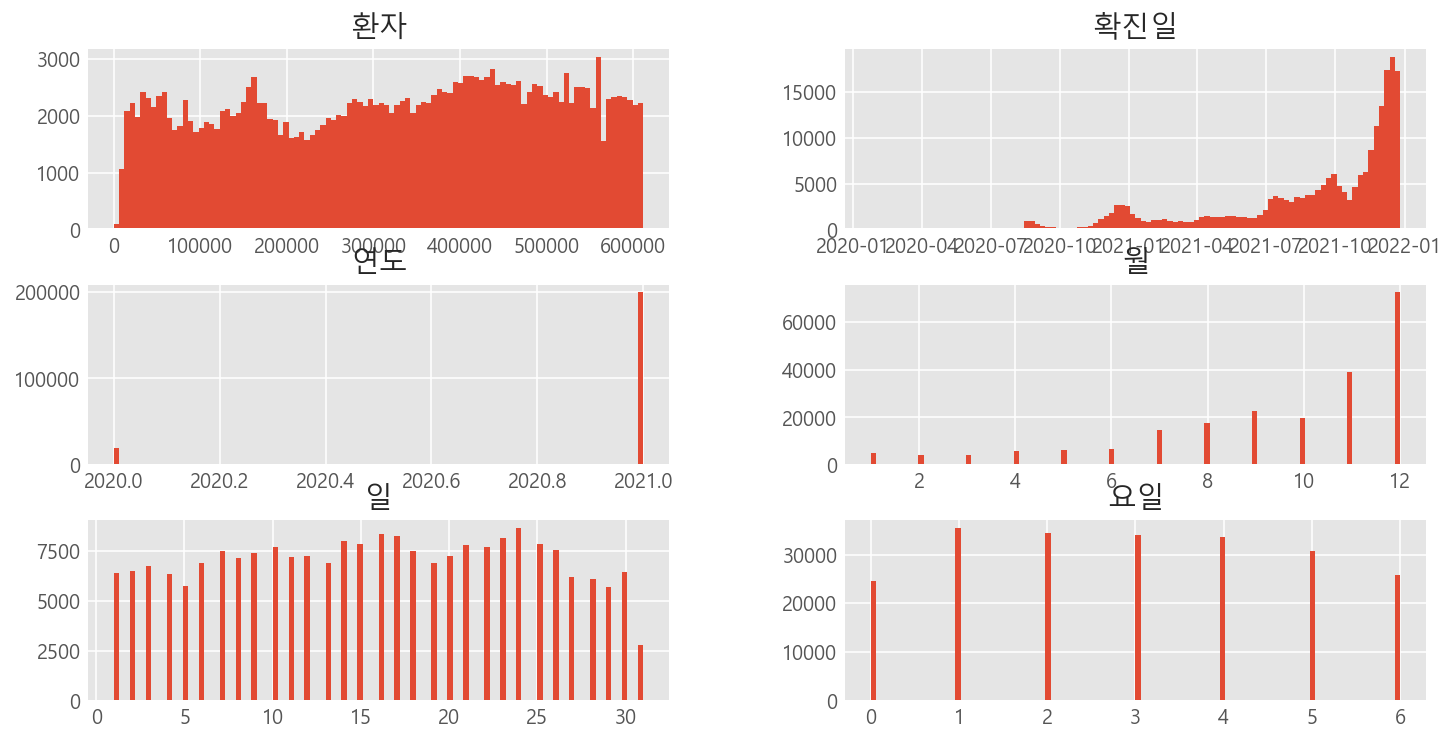

In [132]:
# df.hist로 히스토그램 그리기
df.hist(figsize=(12,6), bins=100) #figsize : 그래프 크기, bins : 막대의 개수
plt.show()

#연, 월은 범주형 데이터 (연속된 수치형 데이터가 아니다 -> 지금 막대기 2개로 설정해도 연은 2개, 월은 12개만 나옴!) 


## value_counts로 하나의 변수에 대한 빈도수 구하기
### 연도

In [135]:
# "연도" 컬럼을 통해 빈도수 구하기
df["연도"].value_counts() # 뒤에 .sort_index().pct_change() 붙이면, 전년도 성장률 나옴!

2021    199253
2020     19393
Name: 연도, dtype: int64

In [137]:
df["연도"].value_counts().sort_index().pct_change() #pct_change = 퍼센트 체인지!

2020        NaN
2021    9.27448
Name: 연도, dtype: float64

In [138]:
df["연도"].value_counts().sort_index().diff() #전해 대비 증감량

2020         NaN
2021    179860.0
Name: 연도, dtype: float64

In [144]:
# "연도" 컬럼의 비율 구하기
df["연도"].value_counts(normalize=True) * 100

2021    91.130412
2020     8.869588
Name: 연도, dtype: float64

In [146]:
df["연도월"] = df["확진일"].astype(str).str[:7]

### 연도월

In [147]:
# 연도월에 대한 빈도수 구하기
# 빈도수를 구하고 sort_index 로 정렬합니다.
# year_month
year_month = df["연도월"].value_counts().sort_index()
year_month[:5]

2020-01      7
2020-02     80
2020-03    391
2020-04    156
2020-05    229
Name: 연도월, dtype: int64

<AxesSubplot:>

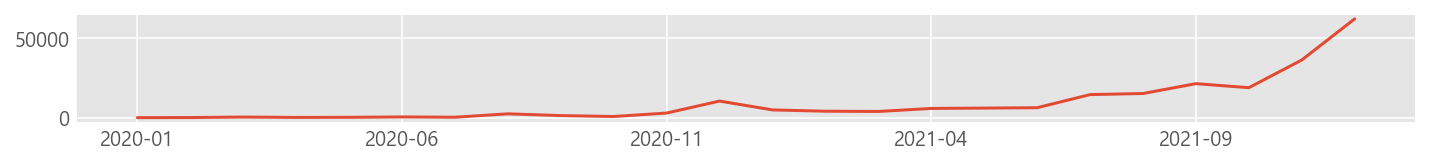

In [148]:
# 연도월을 시각화 합니다.
year_month.plot(figsize=(12,1))

<AxesSubplot:>

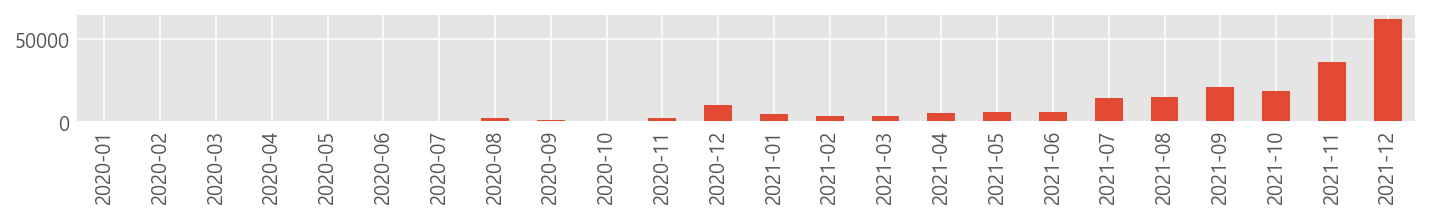

In [150]:
# 연도월을 막대 그래프로 시각화 합니다.
year_month.plot.bar(figsize=(12,1))

### 요일별 빈도수 구하기

In [157]:
# 빈도수 구하고 인덱스 번호로 정렬합니다.
# weekday_count 변수에 담아 재사용합니다.
# weekday_count
weekday_count = df["요일"].value_counts().sort_index()
weekday_count

0    24516
1    35471
2    34548
3    34030
4    33655
5    30692
6    25734
Name: 요일, dtype: int64

In [158]:
# 리스트컴프리헨션 사용해서 리스트 만들기
# "월화수목금토일" 리스트로 만들어 weekday_list 변수로 재사용하기
# weekday_list
for w in "월화수목금토일" :
    print(w)

월
화
수
목
금
토
일


In [159]:
# 인덱스 값을 요일명으로 변경하고 시각화 합니다.
# weekday_count.index
[w for w in "월화수목금토일"] 
#{} 으로 하면 딕셔너리 리스트, [] 쓰면 리스트 컨프리헨션
# 한번만 쓴 사람은 없다! 아주 편리하다!

['월', '화', '수', '목', '금', '토', '일']

### 확진일 빈도수 구하기

In [160]:
# df["확진일"] 빈도수 구하고 인덱스 값인 날짜로 정렬하기
# day_count

day_count = df["확진일"].value_counts().sort_index()
day_count[:2]

2020-01-24    1
2020-01-30    3
Name: 확진일, dtype: int64

<AxesSubplot:>

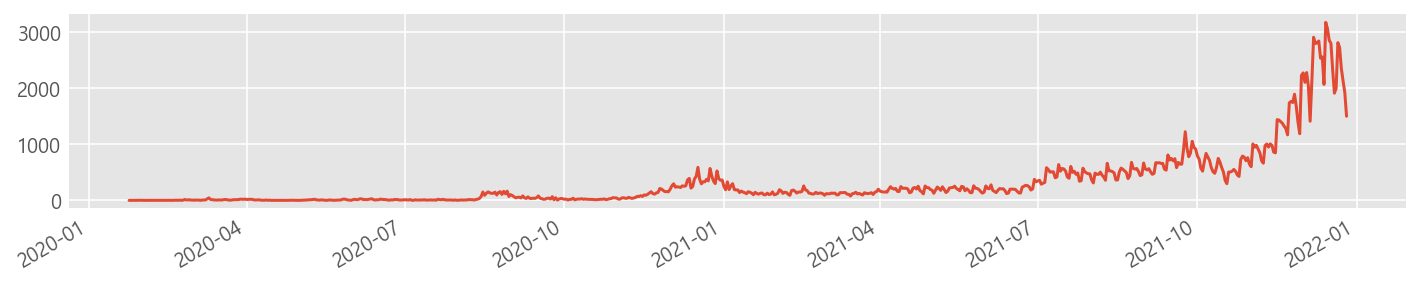

In [161]:
# 선 그래프로 시각화 하기

day_count.plot(figsize=(12,2))

## 전체 확진일 데이터 만들기
### tail로 초기 데이터 보기

<AxesSubplot:>

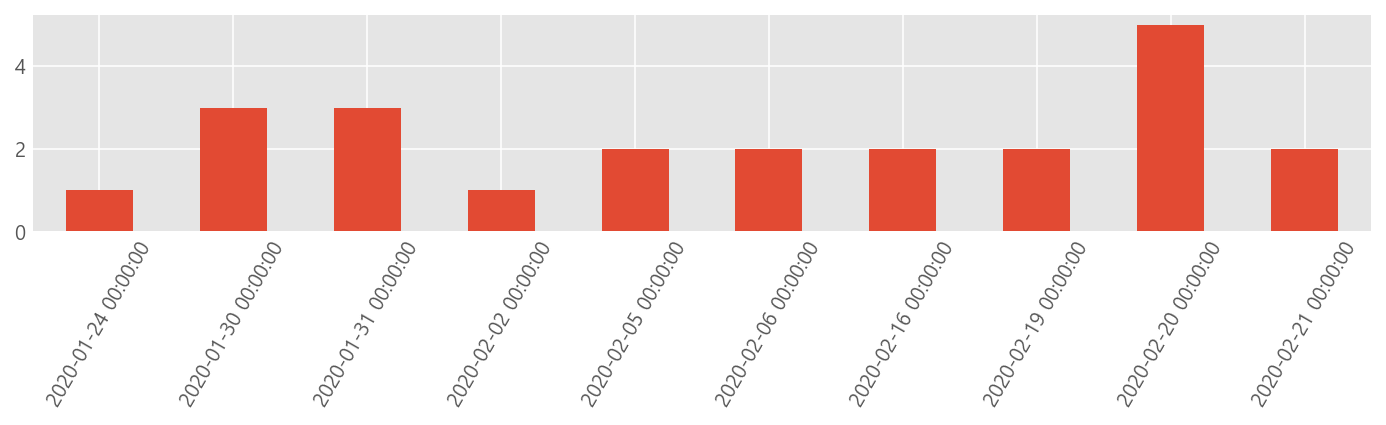

In [164]:
# head(10)로 10번째 확진 데이터를 봅니다.
day_count.head(10).plot.bar(figsize=(12,2), rot=60)

In [165]:
# 주단위로 보려면!!!
df["주"] = df["확진일"].dt.week 

C:\Users\mayo9\AppData\Local\Temp/ipykernel_9452/117358153.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df["주"] = df["확진일"].dt.week


<AxesSubplot:>

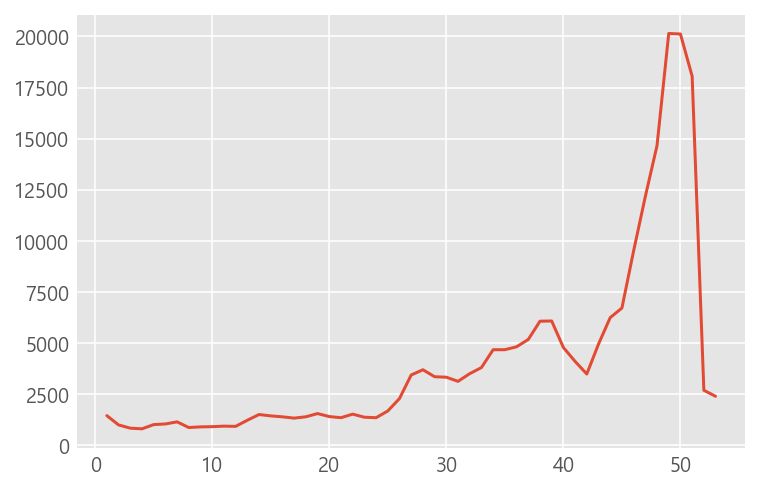

In [166]:
df["주"].value_counts().sort_index().plot()

<AxesSubplot:xlabel='주'>

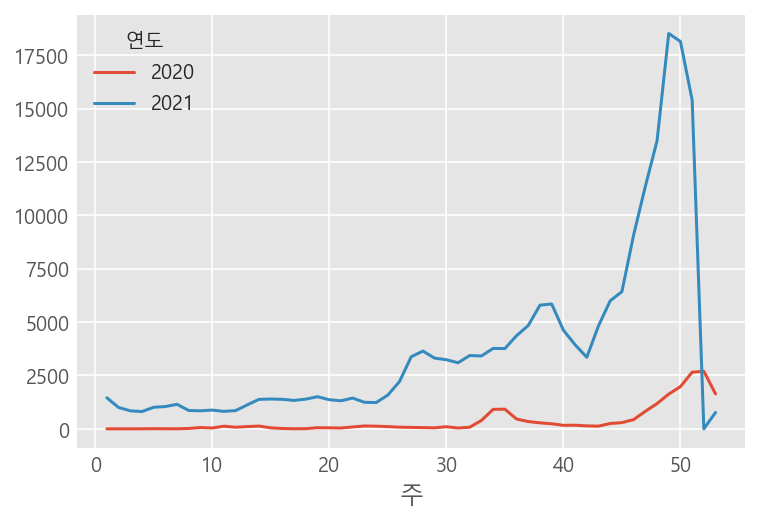

In [167]:
pd.crosstab(df["연도"], df["주"]).T.plot() 
#T : 줄바꿈! , T.plot 이 seaborn 의 hue 와 같다!
#강사님 피셜 : seaborn 보다 pandas 시각화가 더 쉽고 좋다!
# 마지막에 갑자기 떨어진 이유는, 주차별로 지정했기 때문!

### iloc를 통해 첫 확진일과 마지막 확진일자 찾기

In [185]:
last_day = df.iloc[-1]["확진일"]
last_day

Timestamp('2021-12-26 00:00:00')

In [186]:
first_day = df.iloc[0]["확진일"]
first_day

Timestamp('2020-01-24 00:00:00')

### date_range로 전체 기간 데이터 만들기

In [187]:
# pd.date_range 로 전체 기간을 생성합니다.
# all_day
all_day = pd.date_range(first_day, last_day)
all_day

DatetimeIndex(['2020-01-24', '2020-01-25', '2020-01-26', '2020-01-27',
               '2020-01-28', '2020-01-29', '2020-01-30', '2020-01-31',
               '2020-02-01', '2020-02-02',
               ...
               '2021-12-17', '2021-12-18', '2021-12-19', '2021-12-20',
               '2021-12-21', '2021-12-22', '2021-12-23', '2021-12-24',
               '2021-12-25', '2021-12-26'],
              dtype='datetime64[ns]', length=703, freq='D')

In [188]:
# all_day 를 데이터프레임으로 변환합니다.
df_all_day = all_day.to_frame()
df_all_day[:2]

,0
2020-01-24,2020-01-24
2020-01-25,2020-01-25


In [189]:
# "확진수" 라는 컬럼을 생성해서 위에서 구한 day_count 를 추가합니다.
# 확진자가 없는 날도 인덱스에 생성이 됩니다.
df_all_day["확진수"] = day_count
df_all_day

,0,확진수
2020-01-24,2020-01-24,1.0
2020-01-25,2020-01-25,NaN
2020-01-26,2020-01-26,NaN
2020-01-27,2020-01-27,NaN
2020-01-28,2020-01-28,NaN
...,...,...
2021-12-22,2021-12-22,2719.0
2021-12-23,2021-12-23,2346.0
2021-12-24,2021-12-24,2123.0
2021-12-25,2021-12-25,1917.0


In [191]:
# 필요 없는 0 컬럼을 삭제합니다.
# del df_all_day[0]
del df_all_day[0]

### 결측치 채우기

In [192]:
# 비어있는 값은 확진자가 없었던 날이기 때문에 fillna로 0으로 채웁니다.
df_all_day["확진수"] = df_all_day["확진수"].fillna(0).astype(int)

<AxesSubplot:>

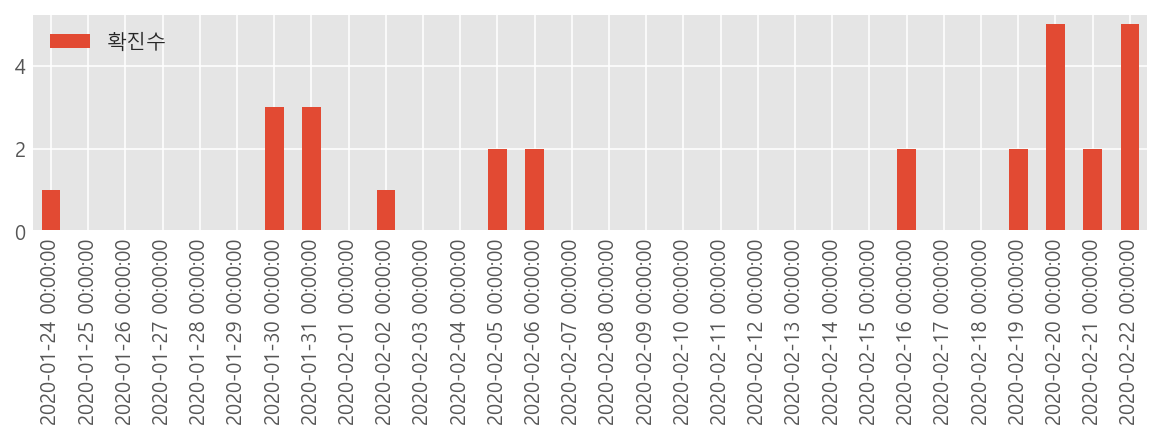

In [193]:
# day_count 에서 초기 30개의 데이터에 대해서 슬라이싱 해서 시각화 합니다.
df_all_day[:30].plot.bar(figsize=(10,2))

### 누적 확진 수 구하기

In [194]:
# df
df

,환자,확진일,거주지,여행력,접촉력,퇴원현황,연도,월,일,요일,요일명,연도월,주
연번,,,,,,,,,,,,,
1,2,2020-01-24,강서구,중국,해외유입,퇴원,2020,1,24,4,금,2020-01,4
2,5,2020-01-30,중랑구,중국,해외유입,퇴원,2020,1,30,3,목,2020-01,5
3,6,2020-01-30,종로구,-,종로구 집단발병,퇴원,2020,1,30,3,목,2020-01,5
4,7,2020-01-30,마포구,중국,해외유입,퇴원,2020,1,30,3,목,2020-01,5
5,9,2020-01-31,성북구,-,기타 확진자 접촉,퇴원,2020,1,31,4,금,2020-01,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
218642,607522,2021-12-26,송파구,-,감염경로 조사중,NaN,2021,12,26,6,일,2021-12,51
218643,607530,2021-12-26,송파구,-,감염경로 조사중,NaN,2021,12,26,6,일,2021-12,51
218644,611537,2021-12-26,송파구,-,감염경로 조사중,NaN,2021,12,26,6,일,2021-12,51


In [196]:
# cumsum 으로 "누적확진수" 구해서 새로운 변수에 담기
# df_all_day["누적확진수"]
df_all_day["누적확진수"] = df_all_day["확진수"].cumsum() #cumsum : 누적 확진자 수!
df_all_day[:2]

,확진수,누적확진수
2020-01-24,1,1
2020-01-25,0,1


<AxesSubplot:>

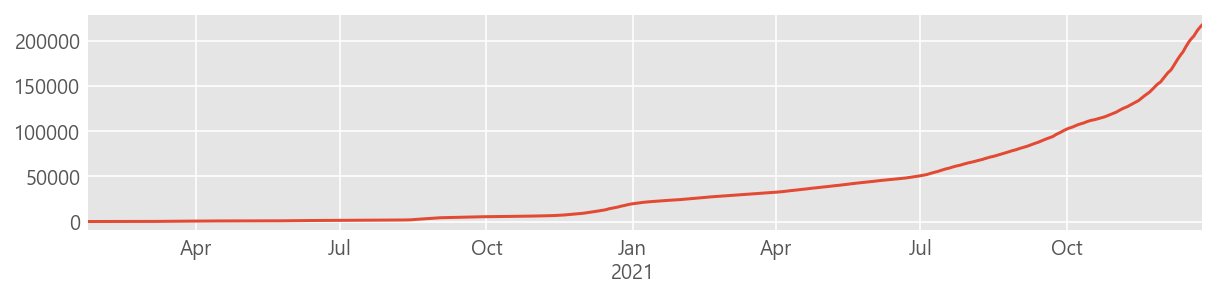

In [197]:
# 시각화 하기
df_all_day["누적확진수"].plot(figsize = (10,2))

## 거주지

In [202]:
# 거주지 빈도수 구하기
df["거주지"].value_counts()

# 왜 마지막에 하나씩 나오는건가 ? -> 

송파구     13235
강남구     12150
타시도     11320
관악구     10992
구로구     10346
영등포구    10225
강서구     10150
은평구      9393
노원구      9327
성북구      9142
동대문구     9091
강동구      8882
동작구      8558
중랑구      8236
서초구      8087
양천구      7709
마포구      7370
광진구      6819
도봉구      6501
강북구      6449
서대문구     5946
금천구      5635
성동구      5530
용산구      5137
기타       4995
종로구      3838
중구       3570
양천구         5
용산구         2
동작구         2
타시도         1
금천구         1
마포구         1
강동구         1
Name: 거주지, dtype: int64

### 타시도, 기타 전처리

In [203]:
# "거주지" => "거주구"로 사본 생성
# df["거주구"]

df["거주구"] = df["거주지"]
df.head(2)

,환자,확진일,거주지,여행력,접촉력,퇴원현황,연도,월,일,요일,요일명,연도월,주,거주구
연번,,,,,,,,,,,,,,
1,2,2020-01-24,강서구,중국,해외유입,퇴원,2020,1,24,4,금,2020-01,4,강서구
2,5,2020-01-30,중랑구,중국,해외유입,퇴원,2020,1,30,3,목,2020-01,5,중랑구


In [204]:
# 텍스트 앞뒤 공백 제거하기
df["거주구"] = df["거주구"].str.strip()

In [205]:
# 타시도 => 기타로 변경하기
df["거주구"] = df["거주구"].replace("타시도", "기타")

In [206]:
# "거주구" 빈도수 구하기
df["거주구"].value_counts()

기타      16316
송파구     13235
강남구     12150
관악구     10992
구로구     10346
영등포구    10225
강서구     10150
은평구      9393
노원구      9327
성북구      9142
동대문구     9091
강동구      8883
동작구      8560
중랑구      8236
서초구      8087
양천구      7714
마포구      7371
광진구      6819
도봉구      6501
강북구      6449
서대문구     5946
금천구      5636
성동구      5530
용산구      5139
종로구      3838
중구       3570
Name: 거주구, dtype: int64

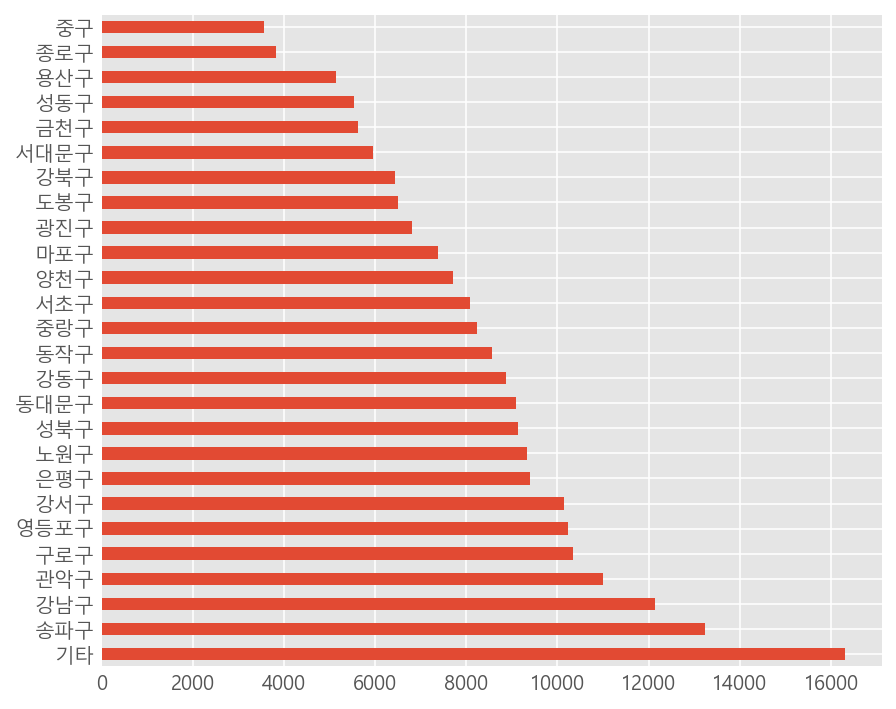

In [213]:
# gu_count 변수에 담긴 값 시각화 하기
gu_count = df["거주구"].value_counts().plot.barh(figsize=(7, 6))

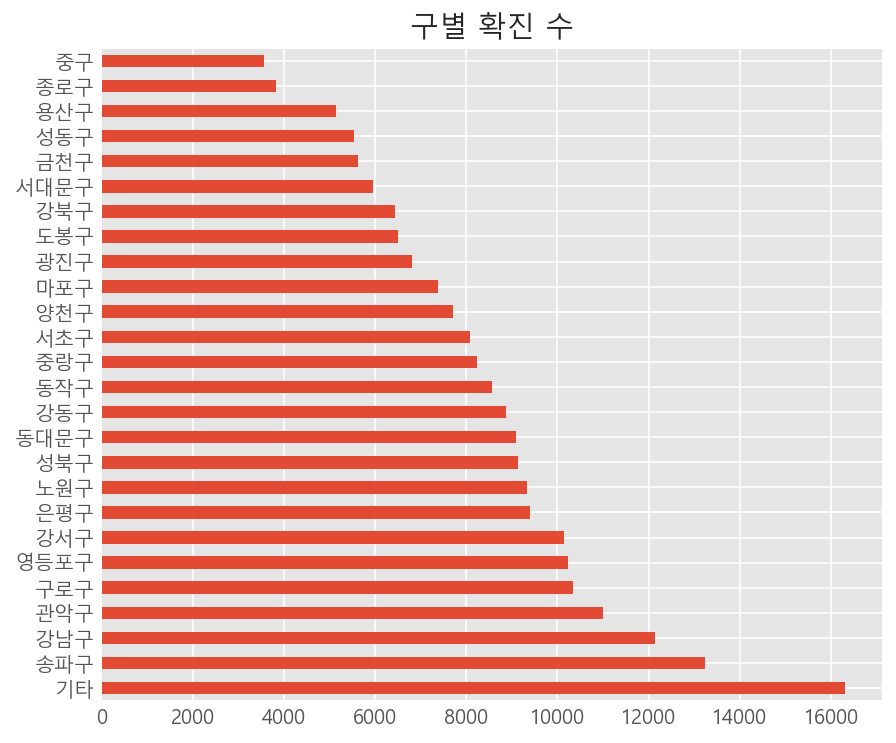

In [212]:
_ = gu_count = df["거주구"].value_counts().plot.barh(figsize=(7, 6), title="구별 확진 수") 
# 앞에 언더바 한 것은, 안쓰는 변수값 할당, 셀과 그래프 사이에 로그가 안뜨고 깔끔하게 나옴!

## 두 개의 변수에 대한 빈도수 구하기
### 연도, 퇴원현황 두 개의 변수에 대한 빈도수 구하기

In [215]:
# pd.crosstab 으로 연도, 퇴원현황 두 개의 변수에 대한 빈도수 구하기
# 연도, 퇴원현황 빈도수 구하기
pd.crosstab(df["연도"], df["퇴원현황"])

퇴원현황,사망,퇴원
연도,,
2020,308,19085
2021,1340,142764


In [217]:
pd.crosstab(df["연도"], df["퇴원현황"], normalize=True)

퇴원현황,사망,퇴원
연도,,
2020,0.001884,0.11673
2021,0.008196,0.87319


In [218]:
# pd.crosstab 으로 연도, 퇴원현황 두 개의 변수에 대한 빈도 빈율 구하기
pd.crosstab(df["연도"], df["퇴원현황"], normalize=True).sum().sum() # 비율 전체 값이 1이 나오도록 

1.0

### 연도, 월 두 개의 변수에 대한 빈도수 구하기

In [ ]:
# pd.crosstab 으로 연도, 월 두 개의 변수에 대한 빈도수 구하기
아래 모두 과제!

In [ ]:
# 시각화 하기


### 연도, 요일 두 개의 변수에 대한 빈도수 구하기

In [ ]:
# pd.crosstab 으로 연도, 요일 두 개의 변수에 대한 빈도수 구하기


In [ ]:
# 리스트컴프리헨션 사용해서 리스트 만들기
# weekday_list


In [ ]:
# 컬럼명 변경하기


### 거주구, 연도월에 대한 빈도수 구하기

In [ ]:
# pd.crosstab 으로 두 개 변수에 대한 빈도수 구하기
# 거주구, 연도월에 대한 빈도수 구하기


In [ ]:
# background_gradient() 로 빈도수 표현하기


In [ ]:
# gu_month.T 로 행과 열을 바꾼 뒤에 보기
# background_gradient()


## Boolean Indexing 으로 특정 조건 값 찾기
### 여러 조건 비교하기

In [ ]:
# 강남구에서 "일요일"에 확진된 데이터만 찾기
# .loc[행]
# .loc[행, 열]
# .loc[조건, 열]


In [ ]:
# 거주구가 강남구이며, 여행력이 일본인 데이터 찾기


### str.contains 활용하기

In [ ]:
# 접촉력의 영문자 검색을 위해 영문자를 모두 대문자로 만들고 "접촉력_대문자"컬럼을 생성하기


In [ ]:
# "접촉력_대문자" 컬럼으로 PC방 데이터를 찾고 접촉력 컬럼에 대해서만 빈도수 구하기


### isin 으로 여러 값 찾기

In [ ]:
# isin 을 사용해 리스트로 여러 값을 찾아오기
# "거주구"가 "강남구", "서초구", "송파구" 인 데이터만 찾기
# loc를 통해 해당 조건의 "접촉력" 컬럼만 가져오기


## 여행력

In [ ]:
#  접촉력이 해외유입인 데이터에 대해 "해외유입" 변수 만들기


In [ ]:
# 거주구, 해외유입 빈도수 구하기


In [ ]:
# 거주구 해외유입 비율 구하기


In [ ]:
# 해외유입 여부에 따라 막대그래프를 그립니다.
# stacked=True 로 두 가지를 함께 그립니다.


## pivot_table 사용하기

In [ ]:
# 거주구별 해외유입 여부에 따른 빈도수 구하기
# gu_over_count


In [ ]:
weekday_list

In [ ]:
# 거주구에 따른 요일별 확진자 빈도수
# df_gu_weekday[weekday_list].style.bar()

## groupby 사용하기

In [ ]:
# "거주구", "해외유입" 으로 그룹화 하여 "환자" 컬럼으로 빈도수 구하기


### Groupby의 unstack()
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.unstack.html

<img src="https://pandas.pydata.org/docs/_images/reshaping_unstack.png" width="600">

In [ ]:
# "거주구", "해외유입" 으로 그룹화 하여 "환자" 컬럼으로 빈도수 구하고
# 마지막 인덱스를 컬럼으로 만들기


In [ ]:
# 연도, 월을 멀티인덱스로 사용하는 빈도수 구하기


In [ ]:
# unstack()으로 월을 컬럼으로 만들기


In [ ]:
# ["연도", "월"] 로 그룹화 하고 "해외유입" 의 describe 값 보기
